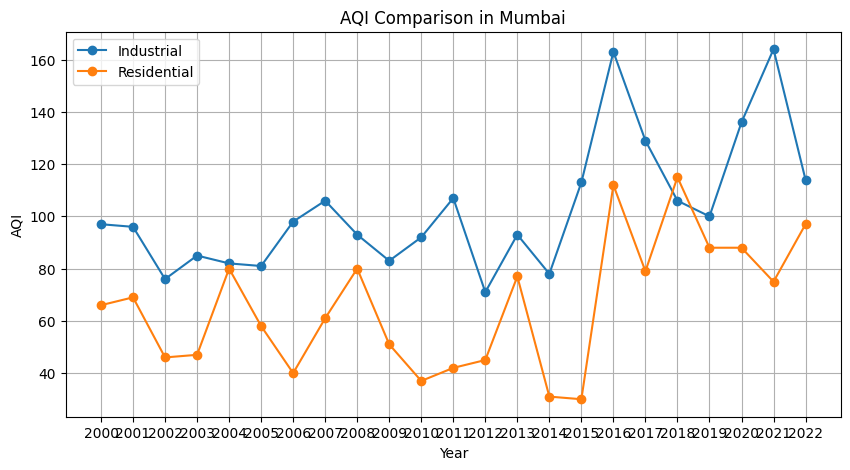

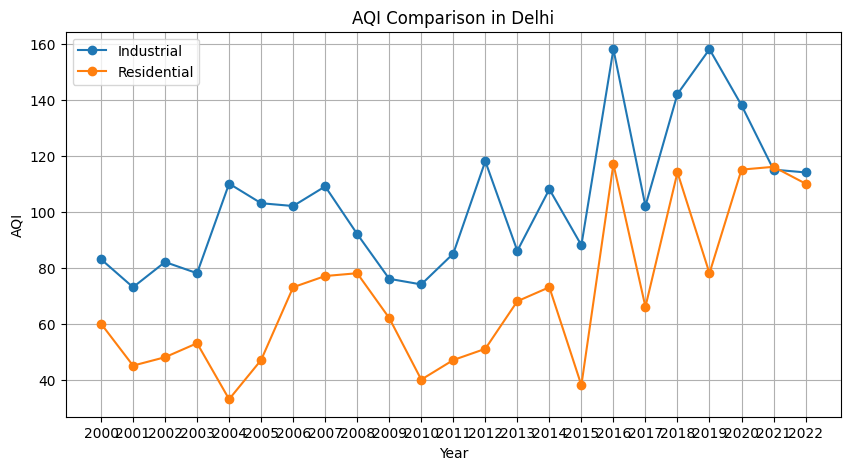

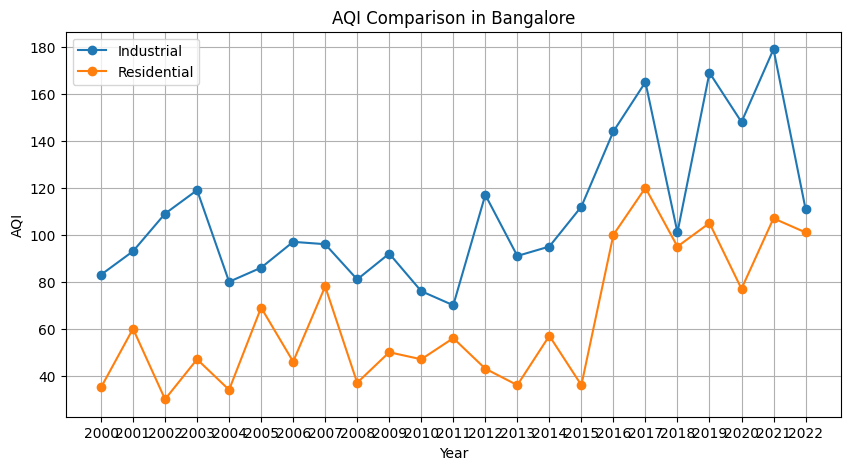

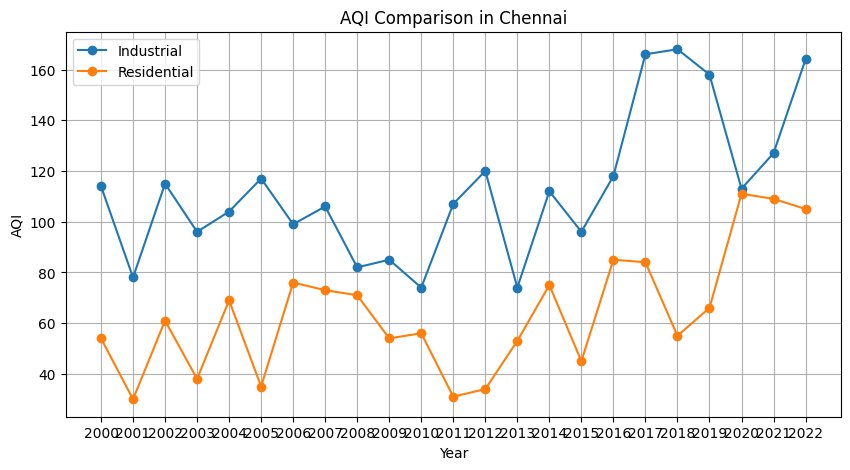

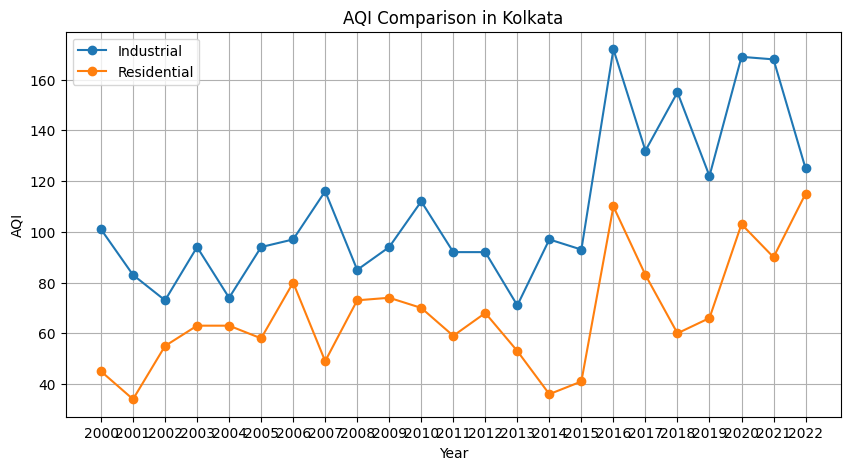

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your data from 'data.csv'
df = pd.read_csv('data.csv')

# List of cities you want to compare
cities = df['City'].unique()

for city in cities:
    city_data = df[df['City'] == city]
    plt.figure(figsize=(10, 5))
    plt.title(f'AQI Comparison in {city}')
    plt.xlabel('Year')
    plt.ylabel('AQI')

    # Plot industrial AQI
    plt.plot(city_data['Year'], city_data['AQI_Industrial'], label='Industrial', marker='o')

    # Plot residential AQI
    plt.plot(city_data['Year'], city_data['AQI_Residential'], label='Residential', marker='o')

    # Get unique years from the data for x-axis ticks
    years = city_data['Year'].unique()
    plt.xticks(years)
    plt.legend()
    plt.grid(True)
    plt.show()

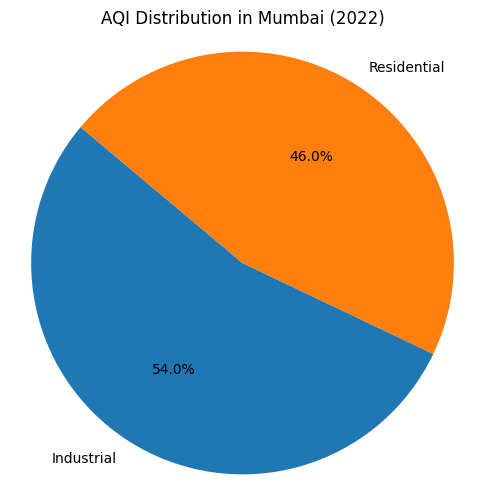

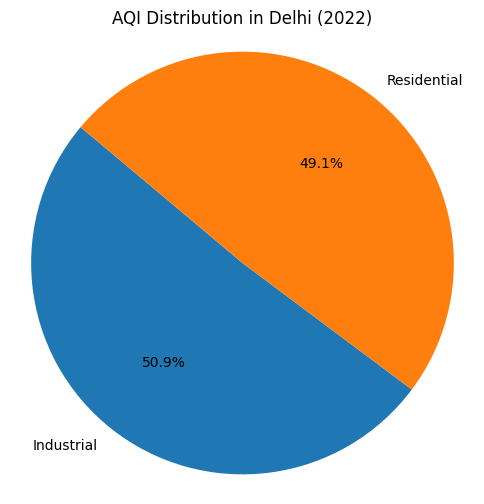

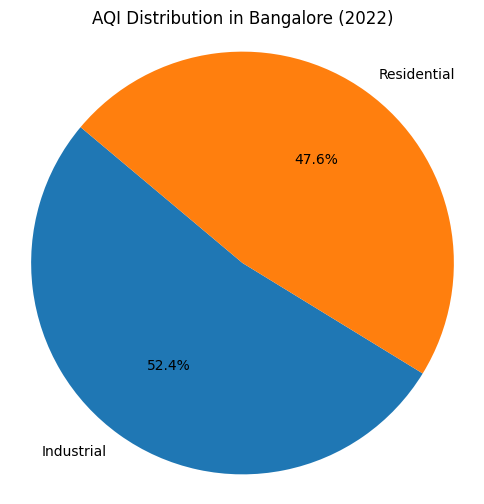

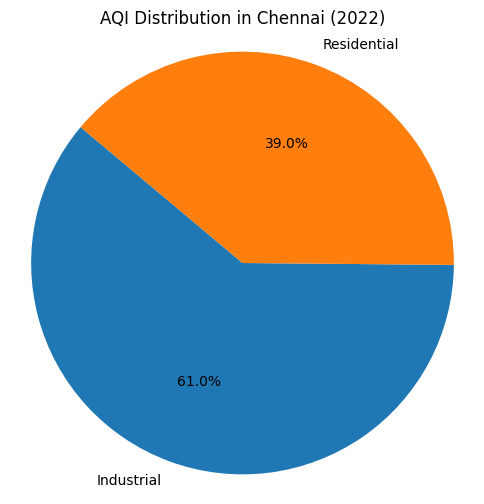

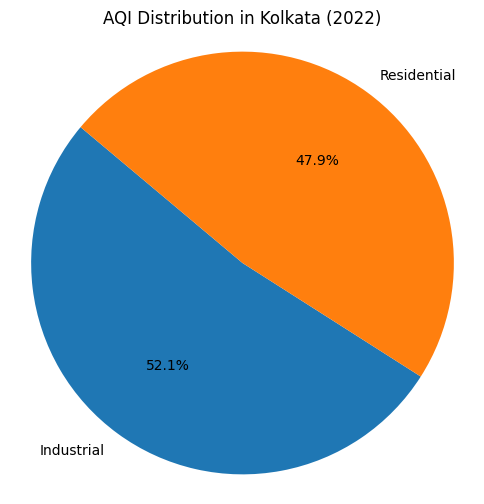

In [15]:
year_to_compare = 2022
pollution_data = df[df['Year'] == year_to_compare].groupby('City')[['AQI_Industrial', 'AQI_Residential']].sum()

for city in cities:
    plt.figure(figsize=(6, 6))
    plt.title(f'AQI Distribution in {city} ({year_to_compare})')
    labels = ['Industrial', 'Residential']
    sizes = pollution_data.loc[city].values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.show()

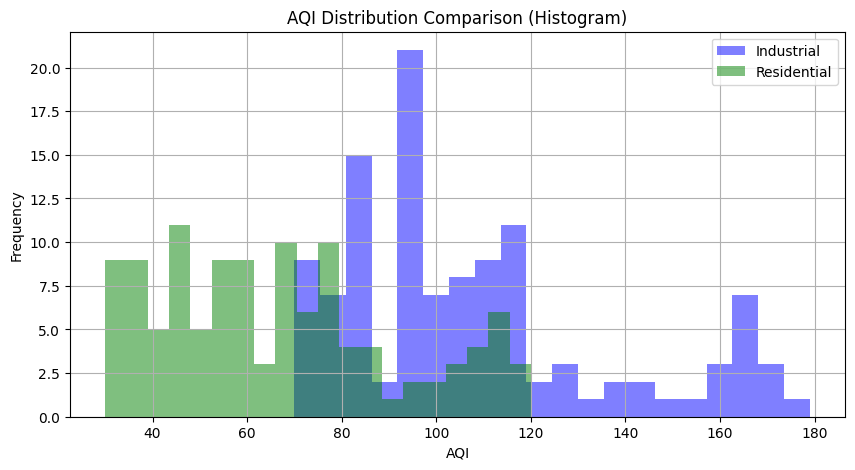

In [16]:
plt.figure(figsize=(10, 5))
plt.title('AQI Distribution Comparison (Histogram)')
plt.xlabel('AQI')
plt.ylabel('Frequency')

plt.hist(df['AQI_Industrial'], bins=20, alpha=0.5, label='Industrial', color='blue')
plt.hist(df['AQI_Residential'], bins=20, alpha=0.5, label='Residential', color='green')
plt.legend()
plt.grid(True)
plt.show()

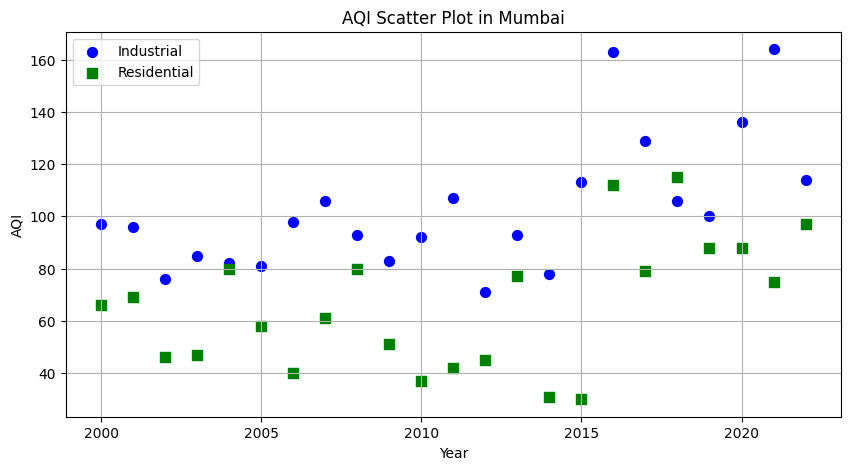

In [17]:
city_to_compare = 'Mumbai'
city_data = df[df['City'] == city_to_compare]

plt.figure(figsize=(10, 5))
plt.title(f'AQI Scatter Plot in {city_to_compare}')
plt.xlabel('Year')
plt.ylabel('AQI')

plt.scatter(city_data['Year'], city_data['AQI_Industrial'], label='Industrial', c='blue', marker='o', s=50)
plt.scatter(city_data['Year'], city_data['AQI_Residential'], label='Residential', c='green', marker='s', s=50)
plt.legend()
plt.grid(True)
plt.show()

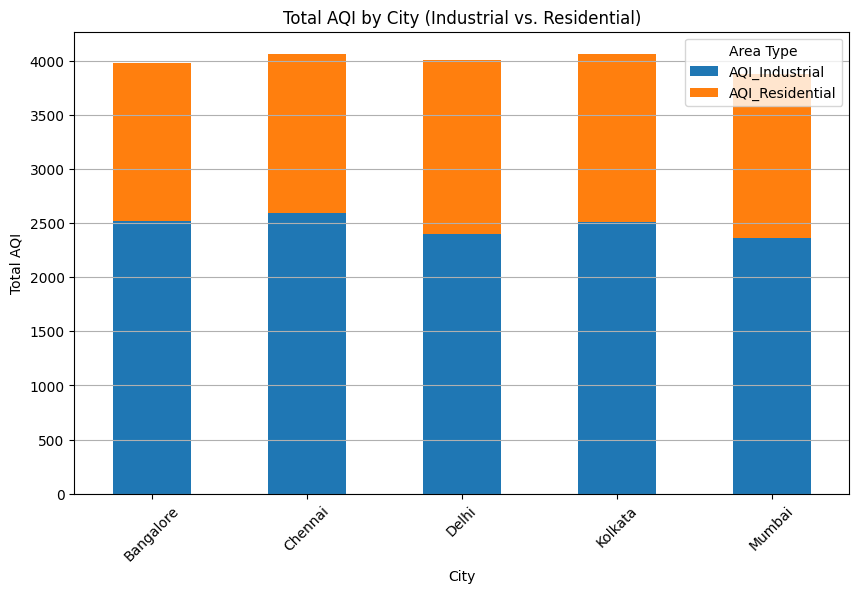

In [18]:
total_pollution = df.groupby('City')[['AQI_Industrial', 'AQI_Residential']].sum()
total_pollution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Total AQI by City (Industrial vs. Residential)')
plt.xlabel('City')
plt.ylabel('Total AQI')
plt.xticks(rotation=45)
plt.legend(title='Area Type')
plt.grid(axis='y')
plt.show()

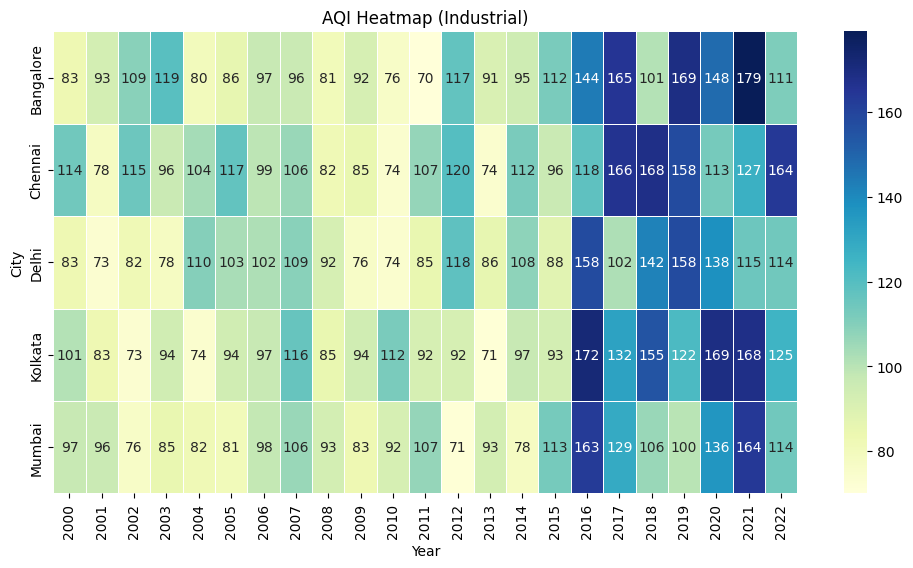

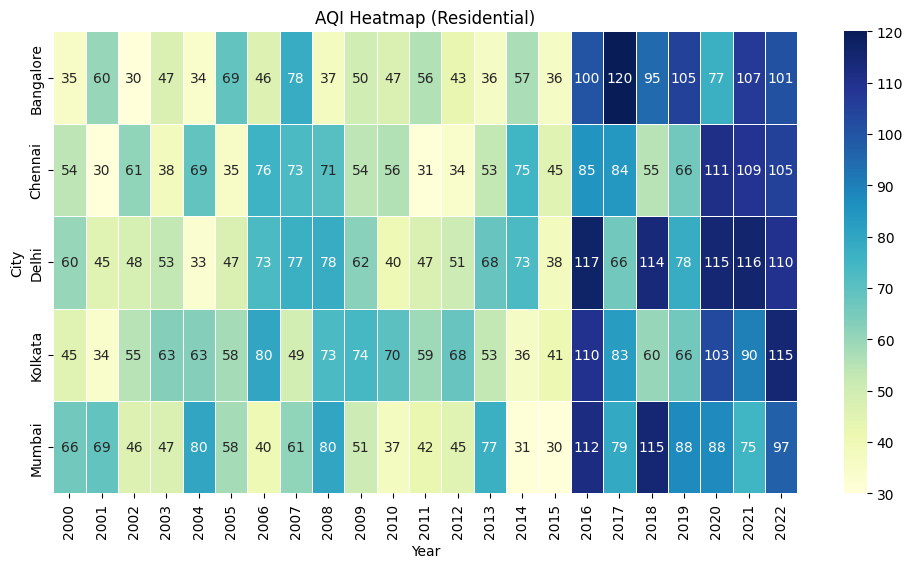

In [19]:
import seaborn as sns

heatmap_data = df.pivot_table(index='City', columns='Year', values='AQI_Industrial', aggfunc='mean')
plt.figure(figsize=(12, 6))
plt.title('AQI Heatmap (Industrial)')
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f', cbar=True, linewidths=0.5)
plt.show()

heatmap_data = df.pivot_table(index='City', columns='Year', values='AQI_Residential', aggfunc='mean')
plt.figure(figsize=(12, 6))
plt.title('AQI Heatmap (Residential)')
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f', cbar=True, linewidths=0.5)
plt.show()
